In [497]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, RFECV
from scipy.stats import randint


In [499]:

main = pd.read_json('../results_cleaned/mdf_all.json')
main = main.dropna(how='any',axis=0) 
main.info()
mdf = main.iloc[:,2:-1]
mdf
# mdf.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 118
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tree_idx      111 non-null    int64  
 1   test_number   111 non-null    object 
 2   leaf_temp     111 non-null    float64
 3   Ta            111 non-null    float64
 4   cwsi          111 non-null    float64
 5   NDVI median   111 non-null    float64
 6   GNDVI median  111 non-null    float64
 7   OSAVI median  111 non-null    float64
 8   LCI median    111 non-null    float64
 9   NDRE median   111 non-null    float64
 10  SWP           111 non-null    float64
 11  SWPc          111 non-null    object 
dtypes: float64(9), int64(1), object(2)
memory usage: 11.3+ KB


,leaf_temp,Ta,cwsi,NDVI median,GNDVI median,OSAVI median,LCI median,NDRE median,SWP
0,31.000000,35.41,0.225049,0.680596,0.564822,0.343672,0.238299,0.165678,21.33
1,31.500000,35.41,0.254403,0.709513,0.589902,0.347813,0.241712,0.165408,16.33
2,30.833333,35.41,0.215264,0.696943,0.578733,0.352290,0.224013,0.152534,24.00
3,30.666667,35.41,0.205479,0.713962,0.580458,0.358707,0.222680,0.149966,17.17
4,30.000000,35.41,0.166341,0.692211,0.576588,0.331614,0.233609,0.160824,18.50
...,...,...,...,...,...,...,...,...,...
114,31.066667,36.07,0.228963,0.671807,0.567401,0.286633,0.226394,0.156473,19.83
115,32.700000,36.07,0.324853,0.678749,0.569933,0.291628,0.220869,0.152646,25.17
116,32.100000,36.07,0.289628,0.648854,0.533746,0.297958,0.182921,0.125482,19.50
117,33.733333,36.07,0.385519,0.575638,0.489463,0.223720,0.153978,0.109748,18.00


In [287]:
corrs = mdf.corr()
print(corrs)
# print(corrs['SWP'].sort_values(ascending=False),'\n')

              leaf_temp        Ta      cwsi  NDVI median  GNDVI median  \
leaf_temp      1.000000  0.427490  1.000000    -0.443665     -0.373845   
Ta             0.427490  1.000000  0.427490     0.096421      0.121853   
cwsi           1.000000  0.427490  1.000000    -0.443665     -0.373845   
NDVI median   -0.443665  0.096421 -0.443665     1.000000      0.947426   
GNDVI median  -0.373845  0.121853 -0.373845     0.947426      1.000000   
OSAVI median  -0.476795  0.044701 -0.476795     0.905588      0.816527   
LCI median    -0.186755  0.143530 -0.186755     0.777831      0.890429   
NDRE median   -0.102780  0.147473 -0.102780     0.659887      0.802874   
SWP            0.430160  0.551078  0.430160     0.054667      0.082618   

              OSAVI median  LCI median  NDRE median       SWP  
leaf_temp        -0.476795   -0.186755    -0.102780  0.430160  
Ta                0.044701    0.143530     0.147473  0.551078  
cwsi             -0.476795   -0.186755    -0.102780  0.430160  
NDV

<AxesSubplot:>

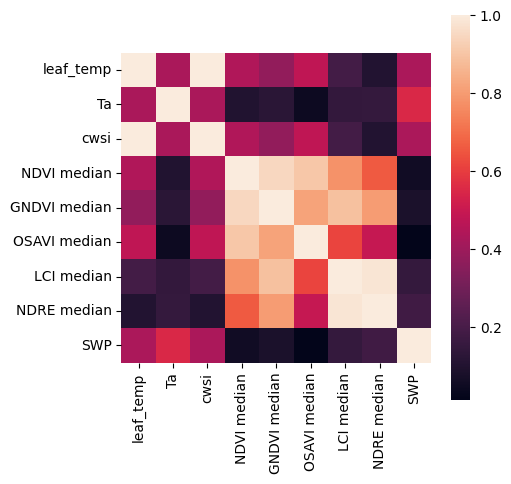

In [288]:
f , ax = plt.subplots(figsize=(5,5))

sns.heatmap(abs(corrs),square=True,vmax=1)

<AxesSubplot:>

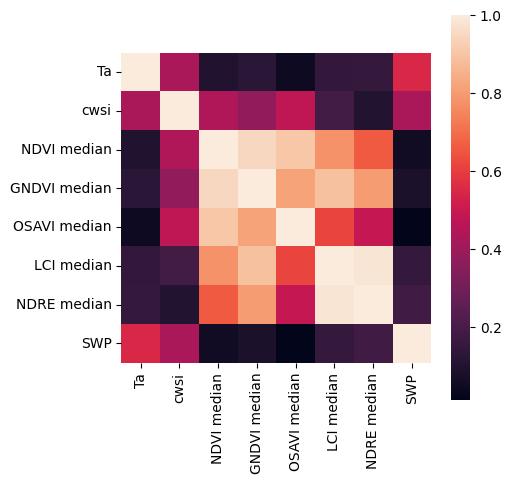

In [502]:
# mdf = mdf.drop(['LCI median','NDVI median','GNDVI median', 'leaf_temp','OSAVI median'], axis=1)
mdf = mdf.drop(['leaf_temp'], axis=1)
corrs = mdf.corr()
f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(abs(corrs),square=True,vmax=1)

In [482]:
bins = (0,18,40)
label_quality = LabelEncoder()
# group_names = ['WL1','WL2']
main['SWPc2'] = pd.cut(main['SWP'], bins=bins)
main['SWPc2'] = label_quality.fit_transform(main['SWPc2'])
main['SWPc2'].isnull().sum()

0

In [483]:
main

,tree_idx,test_number,leaf_temp,Ta,cwsi,NDVI median,GNDVI median,OSAVI median,LCI median,NDRE median,SWP,SWPc,SWPc2
0,1,T1,31.000000,35.41,0.225049,0.680596,0.564822,0.343672,0.238299,0.165678,21.33,WL-2,1
1,2,T1,31.500000,35.41,0.254403,0.709513,0.589902,0.347813,0.241712,0.165408,16.33,WL-1,0
2,3,T1,30.833333,35.41,0.215264,0.696943,0.578733,0.352290,0.224013,0.152534,24.00,WL-3,1
3,4,T1,30.666667,35.41,0.205479,0.713962,0.580458,0.358707,0.222680,0.149966,17.17,WL-1,0
4,5,T1,30.000000,35.41,0.166341,0.692211,0.576588,0.331614,0.233609,0.160824,18.50,WL-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13,T7,31.066667,36.07,0.228963,0.671807,0.567401,0.286633,0.226394,0.156473,19.83,WL-2,1
115,14,T7,32.700000,36.07,0.324853,0.678749,0.569933,0.291628,0.220869,0.152646,25.17,WL-3,1
116,15,T7,32.100000,36.07,0.289628,0.648854,0.533746,0.297958,0.182921,0.125482,19.50,WL-2,1
117,16,T7,33.733333,36.07,0.385519,0.575638,0.489463,0.223720,0.153978,0.109748,18.00,WL-1,0



 SWPc2 
 1    82
0    29
Name: SWPc2, dtype: int64


(0.0, 100.0)

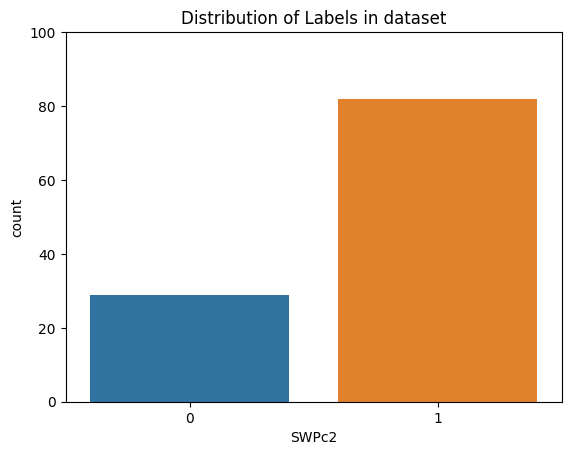

In [484]:
print('\n SWPc2 \n',main['SWPc2'].value_counts())
sns.countplot(x=main['SWPc2'])
plt.title("Distribution of Labels in dataset")
plt.ylim(None,100)


 Test data set 
 1    19
0     9
Name: SWPc2, dtype: int64


(0.0, 100.0)

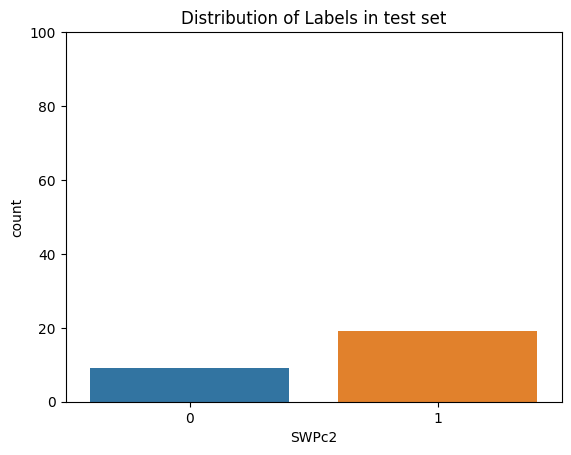

In [485]:
X = mdf.drop('SWP',axis=1)
y = main['SWPc2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, \
                                                    random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

feature_names = mdf.columns[:-1].to_numpy() 
num_features_to_select = 5
cv=10

print('\n Test data set \n',y_test.value_counts())
sns.countplot(x=y_test)
plt.title("Distribution of Labels in test set")
plt.ylim(None,100)

In [486]:
# pca = PCA(n_components=5) 
# X = pca.fit(X).transform(X)

-Random Forest

In [498]:
############ Hyperparameter optimization RandomizedCV and RFECV  ############
rf_param_grid = {
    'clf__n_estimators': randint(10, 500),
    'clf__max_features': ['sqrt', 'log2'],
    'clf__max_depth': randint(1, 5),
    'clf__criterion': ['gini', 'entropy']
}

pipe = Pipeline([
    ('scaler', StandardScaler()),
    # ('selector', RFECV(estimator=RandomForestClassifier(), step=1, cv=5)),
    ('selector', RFE(estimator=RandomForestClassifier(), n_features_to_select=num_features_to_select)),
    ('clf', RandomForestClassifier())
])

# Initialize RandomizedSearchCV
grid_search_rfc = RandomizedSearchCV(estimator=pipe, param_distributions=rf_param_grid, cv=cv, n_jobs=-1, verbose=2)

# Fit to the data
grid_search_rfc.fit(X_train, y_train)

# Extract best estimator
best_rfc = grid_search_rfc.best_estimator_

# Predict using best estimator
pred_rfc = best_rfc.predict(X_test)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [509]:
# Get the best features

print("Current available features: ",feature_names)
rf_support = best_rfc.named_steps['selector'].support_
rf_feature = feature_names[rf_support]
print("Best features for RandomForest: ", rf_feature)

# Get feature importances
importances = best_rfc.named_steps['clf'].feature_importances_

# Get indices of features sorted by their importance
indices = np.argsort(importances)[::-1]

# Print the feature ranking for selected features
print("Feature ranking for selected features:")

for f in range(sum(rf_support)):
    print("%d. feature %s (%f)" % (f + 1, rf_feature[indices[f]], importances[indices[f]]))

print("\n Best Parameters for RF:",grid_search_rfc.best_params_)


############ Hyperparameter optimization gridSearch ############
# rfc = RandomForestClassifier()
# param_grid = {
#     'n_estimators': [10, 15, 25, 50, 100],
#     'max_features': ['sqrt', 'log2'],
#     'max_depth' : [2,3,4,5],
#     'criterion' :['gini', 'entropy']
# }

# grid_search_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, 
#                           cv = cv, n_jobs = -1, verbose = 2)
# grid_search_rfc.fit(X_train, y_train)

# best_grid = grid_search_rfc.best_estimator_
# print(grid_search_rfc.best_params_)

# rfc.fit(X_train, y_train)
# pred_rfc = rfc.predict(X_test)


############ Optimized ############
# rfc = RandomForestClassifier(n_estimators=250)
# rfc.fit(X_train, y_train)
# pred_rfc = rfc.predict(X_test)


print('\n Random Forest accuracy: ',accuracy_score(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

Current available features:  ['Ta' 'cwsi' 'NDVI median' 'GNDVI median' 'OSAVI median' 'LCI median'
 'NDRE median']
Best features for RandomForest:  ['Ta' 'cwsi' 'NDVI median' 'GNDVI median']
Feature ranking for selected features:
1. feature Ta (0.604276)
2. feature cwsi (0.206796)
3. feature GNDVI median (0.105074)
4. feature NDVI median (0.083854)

 Best Parameters for RF: {'clf__criterion': 'gini', 'clf__max_depth': 2, 'clf__max_features': 'log2', 'clf__n_estimators': 180}

 Random Forest accuracy:  0.8928571428571429
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.86      1.00      0.93        19

    accuracy                           0.89        28
   macro avg       0.93      0.83      0.86        28
weighted avg       0.91      0.89      0.89        28

[[ 6  3]
 [ 0 19]]


In [488]:
clf=SVC()
clf.fit(X_train,y_train)
pred_clf = clf.predict(X_test)
print('SVM accuracy: ',accuracy_score(y_test, pred_clf))
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

SVM accuracy:  0.6785714285714286
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.68      1.00      0.81        19

    accuracy                           0.68        28
   macro avg       0.34      0.50      0.40        28
weighted avg       0.46      0.68      0.55        28

[[ 0  9]
 [ 0 19]]


c:\Users\Students\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Students\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Students\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [489]:
gnb= GaussianNB()
gnb.fit(X_train,y_train)
pred_gnb = gnb.predict(X_test)
print('GaussianNB accuracy: ',accuracy_score(y_test, pred_gnb))
print(classification_report(y_test, pred_gnb))
print(confusion_matrix(y_test, pred_gnb))

GaussianNB accuracy:  0.6785714285714286
              precision    recall  f1-score   support

           0       0.50      0.89      0.64         9
           1       0.92      0.58      0.71        19

    accuracy                           0.68        28
   macro avg       0.71      0.73      0.67        28
weighted avg       0.78      0.68      0.69        28

[[ 8  1]
 [ 8 11]]


In [490]:
dt= tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred_dt = dt.predict(X_test)
print('DT accuracy: ',accuracy_score(y_test, pred_dt))
print(classification_report(y_test, pred_dt))
print(confusion_matrix(y_test, pred_dt))

DT accuracy:  0.7857142857142857
              precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.88      0.79      0.83        19

    accuracy                           0.79        28
   macro avg       0.76      0.78      0.77        28
weighted avg       0.80      0.79      0.79        28

[[ 7  2]
 [ 4 15]]


In [491]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
print('KNN accuracy: ',accuracy_score(y_test, pred_knn))
print(classification_report(y_test, pred_knn))
print(confusion_matrix(y_test, pred_knn))

KNN accuracy:  0.75
              precision    recall  f1-score   support

           0       0.75      0.33      0.46         9
           1       0.75      0.95      0.84        19

    accuracy                           0.75        28
   macro avg       0.75      0.64      0.65        28
weighted avg       0.75      0.75      0.72        28

[[ 3  6]
 [ 1 18]]


In [492]:
mlpc= MLPClassifier(hidden_layer_sizes=(15,15),max_iter=2000)
mlpc.fit(X_train,y_train)
pred_mlpc = mlpc.predict(X_test)
print('Neural Network accuracy: ',accuracy_score(y_test, pred_mlpc))
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

Neural Network accuracy:  0.8214285714285714
              precision    recall  f1-score   support

           0       1.00      0.44      0.62         9
           1       0.79      1.00      0.88        19

    accuracy                           0.82        28
   macro avg       0.90      0.72      0.75        28
weighted avg       0.86      0.82      0.80        28

[[ 4  5]
 [ 0 19]]


In [493]:
cval_rf = np.array(cross_val_score(rfc, X, y, cv=cv))
cval_svc = np.array(cross_val_score(clf, X, y, cv=cv))
cval_gnb = np.array(cross_val_score(gnb, X, y, cv=cv))
cval_dt = np.array(cross_val_score(dt, X, y, cv=cv))
cval_knn = np.array(cross_val_score(knn, X, y, cv=cv))
cval_nn = np.array(cross_val_score(mlpc, X, y, cv=cv))

c:\Users\Students\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [494]:
model_stats = pd.DataFrame({
    'Model': ['RandomF', 'SVM', 'GaussianNB', 'DT', 'KNN', 'NN'],
    'CV Mean': [cval_rf.mean(), cval_svc.mean(), cval_gnb.mean(), cval_dt.mean(), cval_knn.mean(), cval_nn.mean()],
    'CV Std': [cval_rf.std(), cval_svc.std(), cval_gnb.std(), cval_dt.std(), cval_knn.std(), cval_nn.std()]
})

model_stats.set_index('Model', inplace=True)
model_stats = model_stats.round(2)
model_stats

,CV Mean,CV Std
Model,,
RandomF,0.87,0.09
SVM,0.89,0.11
GaussianNB,0.64,0.20
DT,0.79,0.19
KNN,0.71,0.23
NN,0.81,0.19


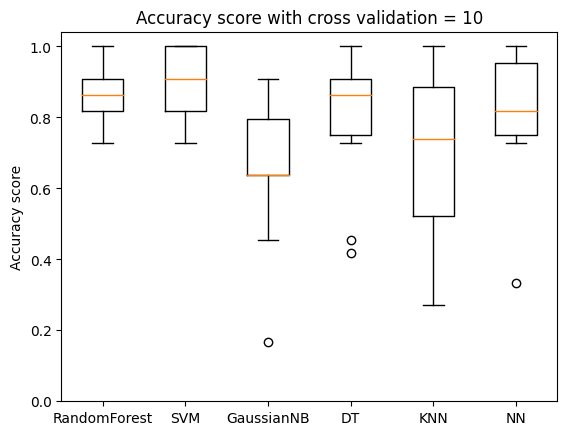

In [495]:
data = [cval_rf,cval_svc,cval_gnb,cval_dt,cval_knn,cval_nn]
plt.boxplot(data)
plt.xticks([1, 2, 3, 4, 5, 6],['RandomForest','SVM','GaussianNB','DT','KNN','NN'])
plt.ylabel('Accuracy score')
plt.title('Accuracy score with cross validation = ' + str(cv))
plt.ylim(bottom=0)
plt.show()

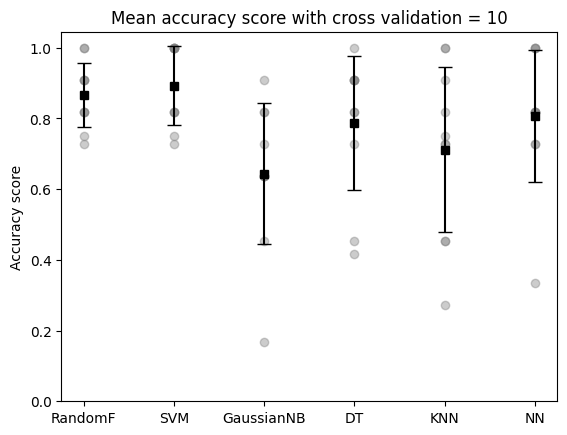

In [496]:
# Prepare the data
models = ['RandomF', 'SVM', 'GaussianNB', 'DT', 'KNN', 'NN']
means = [cval_rf.mean(), cval_svc.mean(), cval_gnb.mean(), cval_dt.mean(), cval_knn.mean(), cval_nn.mean()]
stds = [cval_rf.std(), cval_svc.std(), cval_gnb.std(), cval_dt.std(), cval_knn.std(), cval_nn.std()]
all_values = [cval_rf, cval_svc, cval_gnb, cval_dt, cval_knn, cval_nn]

# Create index for each model
index = np.arange(len(models))

# Create scatter plot for individual scores
for i, values in enumerate(all_values):
    plt.scatter([i]*len(values), values, alpha=0.4, color='gray')

# Create scatter plot for mean scores with error bars
plt.errorbar(index, means, yerr=stds, fmt='s', color='k', capsize=5)

# Label the x-axis with model names
plt.xticks(index, models)

plt.ylabel('Accuracy score')
plt.title('Mean accuracy score with cross validation = ' + str(cv))
plt.ylim(bottom=0)
plt.show()

Optimized Hyperparameters
